# Import data and check null values, column info, and descriptive statistics of the data.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('userbehaviour.csv')

# Display the first few rows of the dataset
df.head()


,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [2]:
# Check for null values
null_values = df.isnull().sum()
print(null_values)

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64


In [3]:
# Check column info
column_info = df.info()
print(column_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB
None


In [4]:
# Get descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

            userid  Average Screen Time  Average Spent on App (INR)  \
count   999.000000           999.000000                  999.000000   
mean   1500.000000            24.390390                  424.415415   
std     288.530761            14.235415                  312.365695   
min    1001.000000             0.000000                    0.000000   
25%    1250.500000            12.000000                   96.000000   
50%    1500.000000            24.000000                  394.000000   
75%    1749.500000            36.000000                  717.500000   
max    1999.000000            50.000000                  998.000000   

       Left Review     Ratings  New Password Request  Last Visited Minutes  
count   999.000000  999.000000            999.000000            999.000000  
mean      0.497497    6.513514              4.941942           5110.898899  
std       0.500244    2.701511              2.784626           8592.036516  
min       0.000000    0.000000              1.000000

# Check the highest, lowest, and average screen time of all the users.

In [5]:
# Calculate highest, lowest, and average screen time 
max_screen_time = df['Average Screen Time'].max()
min_screen_time = df['Average Screen Time'].min()
avg_screen_time = df['Average Screen Time'].mean()

print("Screen time in minutes:\n")
print(f"Highest Screen Time: {max_screen_time}")
print(f"Lowest Screen Time: {min_screen_time}")
print(f"Average Screen Time: {avg_screen_time}")

Screen time in minutes:

Highest Screen Time: 50.0
Lowest Screen Time: 0.0
Average Screen Time: 24.39039039039039


# Check the highest, lowest, and the average amount spent by all the users.

In [6]:
# Calculate highest, lowest, and average amount spent
max_amount_spent = df['Average Spent on App (INR)'].max()
min_amount_spent = df['Average Spent on App (INR)'].min()
avg_amount_spent = df['Average Spent on App (INR)'].mean()

print(f"Highest Amount Spent: {max_amount_spent}")
print(f"Lowest Amount Spent: {min_amount_spent}")
print(f"Average Amount Spent: {avg_amount_spent}")

Highest Amount Spent: 998.0
Lowest Amount Spent: 0.0
Average Amount Spent: 424.4154154154154


# Check the relationship between the spending capacity and screen time of the active users and the users who have uninstalled the app. Also explain your observation.

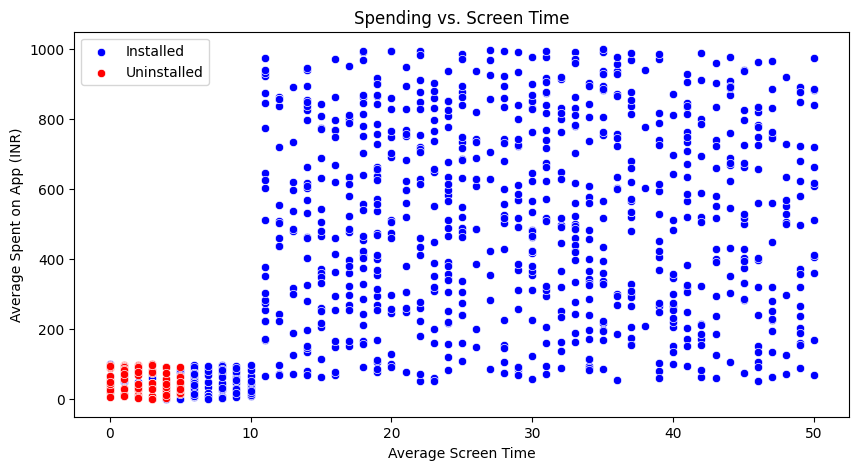

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate active and uninstalled users
active_users = df[df['Status'] == 'Installed']
uninstalled_users = df[df['Status'] == 'Uninstalled']

# Plot relationship between spending capacity and screen time for both groups in a single plot
plt.figure(figsize=(10, 5))

sns.scatterplot(data=active_users, x='Average Screen Time', y='Average Spent on App (INR)', color='blue', label='Installed')
sns.scatterplot(data=uninstalled_users, x='Average Screen Time', y='Average Spent on App (INR)', color='red', label='Uninstalled')

plt.title('Spending vs. Screen Time')
plt.legend()
plt.show()


# Check the relationship between the ratings given by users and the average screen time. Also explain your observation.

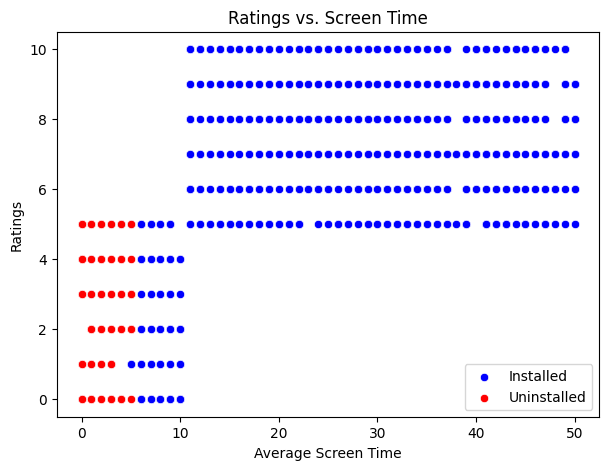

In [8]:
# Plot relationship between ratings and screen time
plt.figure(figsize=(7, 5))
sns.scatterplot(data=active_users, x='Average Screen Time', y='Ratings' ,color='blue', label='Installed')
sns.scatterplot(data=uninstalled_users, x='Average Screen Time', y='Ratings' ,color='red', label='Uninstalled')
plt.title('Ratings vs. Screen Time')
plt.show()

## My Observation

As we can see in above graph, users who uninstalled the app rated it below 6 and had an average usage time of less than 10 minutes. In contrast, users who still have the app installed rated it above 6, with higher average screen time. Only a few users with less screen time rated it below 6. Overall, users with higher screen time gave better ratings, while those with lower screen time rated the app poorly.

# App User segmentation using K-means clustering.


In [9]:
# Preparing data set for segmentation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features
features = df[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [10]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose a different number of clusters
kmeans.fit(scaled_features)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

print(df['Cluster'].value_counts())


Cluster
0    402
2    391
1    206
Name: count, dtype: int64


# Visualize the segments.

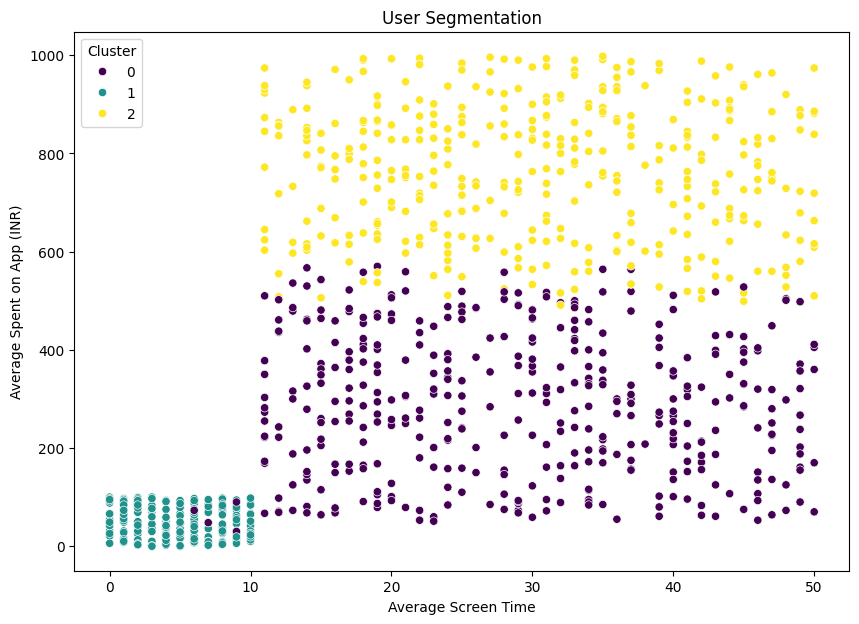

In [11]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Average Screen Time', y='Average Spent on App (INR)', hue='Cluster', palette='viridis')
plt.title('User Segmentation')
plt.show()


# Now check the correlation between different metrics. Also explain your observation from the correlation matrix

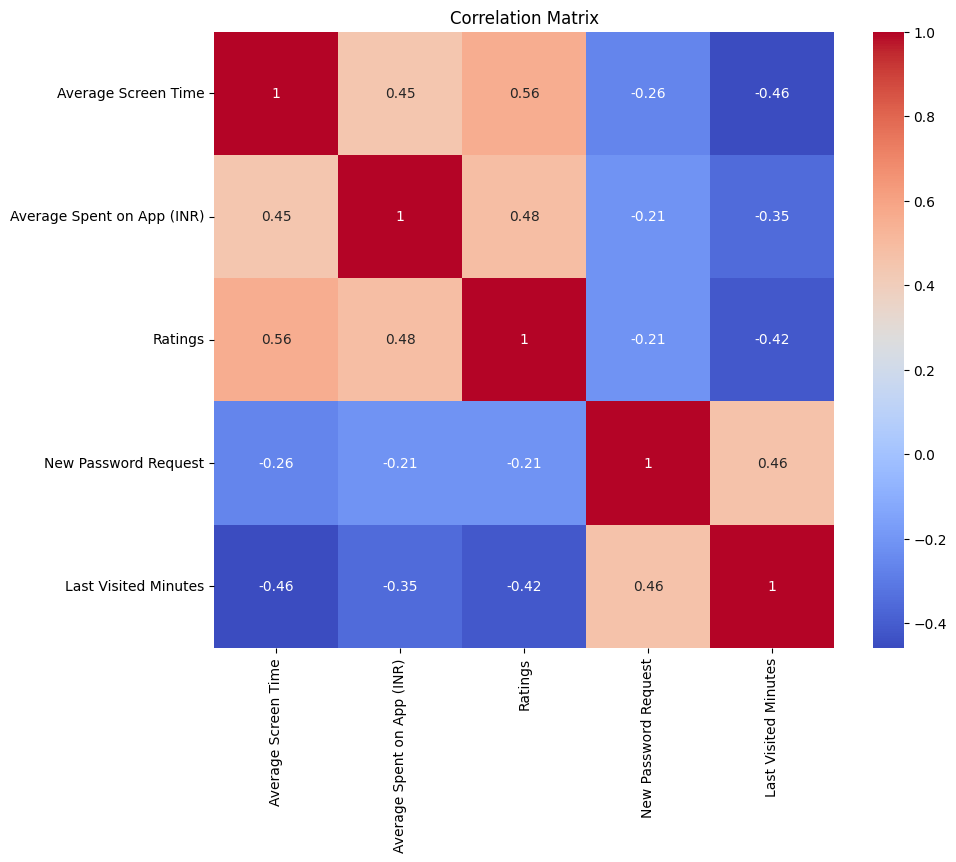

In [12]:
# Select relevant columns for correlation analysis
columns_of_interest = ['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# My Observation:

### Average Screen Time vs. Other Variables:

Average Spent on App (INR): There is a moderate positive correlation (0.45). This indicates that users who spend more time on the app also tend to spend more money on the app.

Ratings: There is a moderate positive correlation (0.56). This suggests that users who spend more time on the app tend to give higher ratings.

New Password Request: There is a weak negative correlation (-0.26). This means that users who spend more time on the app request fewer new passwords.

Last Visited Minutes: There is a moderate negative correlation (-0.46). This suggests that users who have spent more time on the app recently have shorter intervals since their last visit.

### Average Spent on App (INR) vs. Other Variables:
Ratings: There is a moderate positive correlation (0.48). This indicates that users who spend more money on the app tend to give higher ratings.

New Password Request: There is a weak negative correlation (-0.21). This suggests that users who spend more money on the app request fewer new passwords.

Last Visited Minutes: There is a moderate negative correlation (-0.35). This indicates that users who spend more money on the app tend to have shorter intervals since their last visit.

### Ratings vs. Other Variables:
New Password Request: There is a weak negative correlation (-0.21). This indicates that users who give higher ratings tend to request fewer new passwords.

Last Visited Minutes: There is a moderate negative correlation (-0.42). This suggests that users who give higher ratings have shorter intervals since their last visit.

### New Password Request vs. Last Visited Minutes:
There is a moderate positive correlation (0.46). This indicates that users who request new passwords more frequently also tend to have longer intervals since their last visit.

## Overall Observation:
Positive Correlations: Variables like average screen time, amount spent on the app, and ratings are positively correlated with each other. This suggests that engaged users (who spend more time and money) tend to rate the app higher.

Negative Correlations: Variables related to user inactivity (new password requests and last visited minutes) tend to negatively correlate with engagement metrics. This indicates that less engaged users (who visit the app less frequently and request new passwords more often) rate the app lower and spend less time and money on the app.

# Now, detect anomalies in search queries. You can use various techniques for anomaly detection. A simple and effective method is the Isolation Forest algorithm, which works well with different data distributions and is efficient with large datasets. Show results like this.

In [13]:

# Select relevant features
from sklearn.ensemble import IsolationForest


features = ['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']

# Prepare the data
X = df[features]

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Predict anomalies
df['Anomaly'] = model.predict(X)

# Filter out the anomalies
anomalies = df[df['Anomaly'] == 1]

# Display the anomalies with relevant columns
print(anomalies[['userid', 'Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']])

     userid  Average Screen Time  Average Spent on App (INR)  Ratings  \
0      1001                 17.0                       634.0        9   
2      1003                 37.0                       207.0        8   
3      1004                 32.0                       445.0        6   
4      1005                 45.0                       427.0        5   
5      1006                 28.0                       599.0        9   
..      ...                  ...                         ...      ...   
994    1995                 38.0                       938.0        5   
995    1996                 43.0                        61.0        6   
996    1997                 47.0                       761.0        6   
997    1998                  6.0                        73.0        5   
998    1999                  9.0                        54.0        4   

     New Password Request  Last Visited Minutes  
0                       7                  2990  
2                      

# Explain the summary of your working.

In this assignment, I analyzed user behavior data to segment app users based on their engagement and other factors. Here is a summary of the steps and findings:

1. Analyzed the screen time data.
- Highest Screen Time: 50.0 minutes
- Lowest Screen Time: 0.0 minutes
- Average Screen Time: 24.39 minutes

2. Spending Analysis:
- Highest Amount Spent: INR 998.0
- Lowest Amount Spent: INR 0.0
- Average Amount Spent: INR 424.42

3. Relationship Analysis: \
Examined the relationship between spending capacity and screen time for both active users and users who have uninstalled the app using a scatter plot. The plot indicates that active users tend to spend more time and money on the app compared to uninstalled users.
Examined the relationship between ratings and average screen time using a scatter plot, showing that higher screen time correlates with higher ratings.

4. User Segmentation: \
Applied the K-means clustering algorithm to segment users into three clusters based on their behavior.
Visualized the segments using a scatter plot, identifying the distribution of users across different clusters.
Correlation Analysis:

5. Created a correlation matrix to understand the relationships between different metrics.

6. Anomaly Detection: \
Identified anomalies in user behavior using the Isolation Forest algorithm, highlighting users with unusual patterns in the dataset.


## Conclusion
This analysis provides insights into user behavior, helping identify key patterns that can inform strategies for improving user retention and engagement. The segmentation and correlation analysis highlight the importance of user engagement in driving positive outcomes for the app.